<a href="https://colab.research.google.com/github/FilipeLima/Intro-Pandas/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <a href="https://pymat.com.br/"> <img src="https://github.com/pymatufrpe/pymat2021/blob/master/assets/images/logos/logopymat21.jpg?raw=true"  alt="PyMat"   float:"left" /></a>
</p>

# Workshop #5: **Manipulação de Dados e Regressões Lineares com Python**
**Autor: Filipe Mendonça de Lima** 

[Github do Workshop](https://github.com/FilipeLima/Intro-Pandas)

**Pacotes Importantes**
  <ol>
  <li>Pandas: Biblioteca para manipulação e análise de dados. </li>
  <li>Numpy: Biblioteca para manipulação de matrizes e outras funções Matemáticas. </li>
  <li>Matplotlib.pyplot: Conjunto de funções mais avançadas para gráficos no Python.</li>
  <li>Seaborn: Biblioteca baseada em Matplotlib com funções voltadas para visualização de dados estatísticos.</li>
  </ol>




# Sumário


<ol>
<li>Iniciação ao Pandas</li>
  <ol>
  <li>Informações sobre o dataset</li>
  <li>Analisando Variáveis</li>
  <li>Filtrando e selecionando</li>
  <li>Visualizando variáveis com Seaborn</li>
  <li>Alterando e criando Variáveis</li>
  </ol>
<li>O problema da lista de notas</li>
  <ol>
  <li>Informações sobre o dataset</li>
  <li>Problemas do dataset</li>
  <li>Organizando os dados</li>
  <li>Respondendo às perguntas</li>
  </ol>
<li>Regressões Lineares</li>
  <ol>
    <li>O Método dos Mínimos Quadrados</li>
  <li>Regressões Lineares Univariadas</li>

  </ol>
</ol>


#Iniciação ao Pandas













Um DataFrame é uma estrutura de dados retangular onde cada coluna (*variável*) é formada por um vetor de dados com o **mesmo tipo**.
Exemplo de dataframe criado no Pandas

In [110]:
import pandas as pd
import numpy as np

conjunto={'col1':[1,2,3,4],'col2':['A',np.nan,'C','D'],'col3':[1.2,3.4,3,np.nan],
    'VouF':[True,True,False,False]}
dataframe=pd.DataFrame(data=conjunto)
print(dataframe)
print(dataframe.dtypes)

   col1 col2  col3   VouF
0     1    A   1.2   True
1     2  NaN   3.4   True
2     3    C   3.0  False
3     4    D   NaN  False
col1      int64
col2     object
col3    float64
VouF       bool
dtype: object


## Informações sobre o dataset

Carregando o dataset Diamonds de exemplo utilizando a biblioteca Seaborn.

In [111]:
import seaborn as sns
diamonds=sns.load_dataset('diamonds')
diamonds.head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Algumas informações, tiradas do [Kaggle](https://www.kaggle.com/shivam2503/diamonds):
<ul>
<li> <b>price</b>- Preço em dólares americanos.</li>
<li> <b>carat</b> - Massa do diamante em quilates (200mg)</li>

<li> <b>cut</b> - Qualidade do corte: (<i>Fair</i>, <i>Good</i>, <i>Very Good</i>, <i>Premium</i>, <i>Ideal</i>)</li>
<li> <b>color</b> - Cor do diamante, do <i>J</i> (Pior) ao <i>D</i> (Melhor) </li>

<li> <b>clarity</b> -
Medida de claridade (transparência) do diamante, iniciando no <i>I1</i> (Pior), <i>SI2</i>, <i>SI1</i>, <i>VS2</i>, <i>VS1</i>, <i>VVS2</i>, <i>VVS1</i>, <i>IF</i> (Melhor) </li>
<li> <b>x</b> - Comprimento em mm </li>
<li> <b>y</b> - Largura em mm </li>
<li> <b>z</b> - Profundidade em mm </li>
<li> <b>depth</b> - Profundidade total percentual =
 2 * z / (x + y) </li>
<li> <b>table</b> - Largura do topo do diamante relativo ao ponto mais largo </li>
</ul>

Quantas linhas e colunas há no dataset?

In [112]:
diamonds.shape

(53940, 10)

Quais as variáveis (*features* ou colunas) do dataset?

In [113]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Qual tipo de dado de cada variável?

In [114]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Analisando as variáveis

Como efetuar estatística descritiva das variáveis quantitativas?

In [115]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

Como calcular os quantis diferentes?

In [116]:
diamonds['price'].quantile(0.95)

13107.099999999991

Em relação às variáveis categóricas, como obter informações sobre seu conteúdo?

In [117]:
for i in ['cut','color','clarity']:
    print(diamonds[i].describe())



count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object
count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object
count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object


Como saber a frequência dos elementos de uma variável categórica?




In [118]:
for i in ['cut','color','clarity']:
    print(diamonds[i].value_counts())


Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


A frequência pode ser relativa?

In [120]:
100*diamonds['cut'].value_counts()/len(diamonds['cut'])




Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64

## Filtrando e selecionando

E se quisermos ver os diamantes que possuem uma determinada condição específica?

Por exemplo, diamantes que possuem o corte ideal? Podemos fazer uma comparação simples com a variável desejada.

In [121]:
diamonds['cut']=='Ideal'

0         True
1        False
2        False
3        False
4        False
         ...  
53935     True
53936    False
53937    False
53938    False
53939     True
Name: cut, Length: 53940, dtype: bool

Notar que essa comparação traz uma coluna com Verdadeiro ou Falso para cada linha (diamante) do dataset. Para obtermos um visualização melhor, podemos inserir essa coluna (vetor) nos colchetes:

In [122]:
diamonds[diamonds['cut']=='Ideal']

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


Nos casos de variáveis quantitativas, podemos filtrar por intervalo na variável utilizando operadores booleanos.

In [123]:
diamonds[(diamonds['price']>=15000)&(diamonds['price']<17000)]


,carat,cut,color,clarity,depth,table,price,x,y,z
25884,1.60,Ideal,G,VS2,61.9,56.0,15000,7.53,7.47,4.64
25885,1.54,Premium,E,VS2,62.3,58.0,15002,7.31,7.39,4.58
25886,1.19,Ideal,F,VVS1,61.5,55.0,15005,6.82,6.84,4.20
25887,2.10,Premium,I,SI1,61.5,57.0,15007,8.25,8.21,5.06
25888,1.69,Ideal,D,SI1,60.8,57.0,15011,7.69,7.71,4.68
...,...,...,...,...,...,...,...,...,...,...
26937,2.41,Ideal,I,SI2,62.5,57.0,16987,8.57,8.51,5.34
26938,1.50,Very Good,E,VS1,59.5,61.0,16988,7.43,7.46,4.43
26939,2.12,Premium,H,SI2,59.1,59.0,16992,8.47,8.43,4.99
26940,2.27,Premium,J,VS1,62.4,58.0,16994,8.36,8.41,5.23


Podemos combinar filtrar os diamantes com quilate entre 1 e 5 e possuam corte ideal.

In [124]:
diamondsCarat=diamonds[((diamonds['carat']>=1 ) & (diamonds['carat']<=5)) & (
    diamonds['cut']=='Ideal')]

In [125]:
diamondsCarat.describe()

,carat,depth,table,price,x,y,z
count,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000
mean,1.303392,61.727581,56.256593,8563.427768,6.969872,6.973361,4.301273
std,0.332879,0.835896,1.336634,3806.948601,0.560165,0.548129,0.359534
min,1.000000,43.000000,43.000000,2416.000000,0.000000,0.000000,0.000000
25%,1.060000,61.300000,55.000000,5442.250000,6.550000,6.560000,4.040000
50%,1.200000,61.800000,56.000000,7524.500000,6.800000,6.800000,4.200000
75%,1.510000,62.300000,57.000000,10846.750000,7.340000,7.340000,4.540000
max,3.500000,66.700000,62.000000,18806.000000,9.650000,9.590000,6.030000


In [126]:
diamonds[(diamonds['carat']>3.5)&(diamonds['carat']<5)]

,carat,cut,color,clarity,depth,table,price,x,y,z
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


Podemos também selecionar linhas utilizando os índices com a propriedade .iloc. **IMPORTANTE: Só utilizar números inteiros**.

In [127]:
diamonds.iloc[100:200,0:3]

,carat,cut,color
100,0.75,Very Good,D
101,0.75,Premium,E
102,0.74,Ideal,G
103,0.75,Premium,G
104,0.80,Ideal,I
...,...,...,...
195,0.70,Premium,E
196,0.70,Premium,E
197,0.70,Premium,E
198,0.70,Ideal,E


In [128]:
diamonds.iloc[25000:,5:]

,table,price,x,y,z
25000,59.0,13530,7.07,7.11,4.24
25001,60.0,13530,7.61,7.50,4.49
25002,57.0,13531,8.11,8.08,4.99
25003,55.0,13532,7.33,7.38,4.57
25004,56.0,13536,6.83,6.91,4.30
...,...,...,...,...,...
53935,57.0,2757,5.75,5.76,3.50
53936,55.0,2757,5.69,5.75,3.61
53937,60.0,2757,5.66,5.68,3.56
53938,58.0,2757,6.15,6.12,3.74


A propriedade .loc utiliza os índices e os nomes das variáveis como forma de seleção.

In [129]:
diamonds.loc[25000:,'carat']

25000    1.29
25001    1.52
25002    2.00
25003    1.51
25004    1.25
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 28940, dtype: float64

In [130]:
diamonds.loc[25000:,['carat',"price",'color']]

,carat,price,color
25000,1.29,13530,E
25001,1.52,13530,F
25002,2.00,13531,H
25003,1.51,13532,G
25004,1.25,13536,E
...,...,...,...
53935,0.72,2757,D
53936,0.72,2757,D
53937,0.70,2757,D
53938,0.86,2757,H


Todas essas maneiras podem ser utilizadas em conjunto. Por exemplo: Diamantes com cortes Ideal, Premium ou Very Good, com quilate acima de 1 e cores D, E ou F, organizados por price, carat, cut, color e clarity.

In [131]:
#diamonds[diamonds['cut'].isin(['Ideal','Premium','Very Good'])]['cut'].unique()

diamonds[(diamonds['cut'].isin(['Ideal','Premium','Very Good'])) & (
    diamonds['carat']>1) & (diamonds['color'].isin(
        ['D','E','F']))].loc[:,['price','carat','cut','color','clarity']]

,price,carat,cut,color,clarity
215,2781,1.01,Premium,F,I1
800,2862,1.22,Premium,E,I1
844,2869,1.08,Premium,D,I1
1363,2964,1.05,Premium,E,I1
1649,3018,1.02,Very Good,F,SI2
...,...,...,...,...,...
27740,18791,1.71,Premium,F,VS2
50410,2257,1.01,Premium,F,I1
50705,2291,1.01,Very Good,D,I1
51292,2360,1.20,Premium,F,I1


Uma outra opção é utilizar o método .query() para filtrar colunas. Ele faz uma consulta baseado na string que você passa como parâmetro. Podemos refazer uma consulta anterior utilizando .query():

In [132]:
diamonds.query('carat<5 & carat>3.5')

,carat,cut,color,clarity,depth,table,price,x,y,z
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


Você pode visualizar o dataset ordenando algumas variáveis com o método .sort_values().

In [133]:
diamonds.sort_values(by=['carat','price'],ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
...,...,...,...,...,...,...,...,...,...,...
31598,0.20,Very Good,E,VS2,63.4,59.0,367,3.74,3.71,2.36
31599,0.20,Ideal,E,VS2,62.2,57.0,367,3.76,3.73,2.33
31600,0.20,Premium,D,VS2,62.3,60.0,367,3.73,3.68,2.31
31601,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31


## Visualizando variáveis com Seaborn

Vamos utilizar alguns comandos da biblioteca Seaborn para visualizar os dados do dataset.

### **Gráfico de dispersão**

Gráfico de pontos relacionando uma variável a outra. Utilizaremos preço e quilate com pyplot. [Mais informações](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

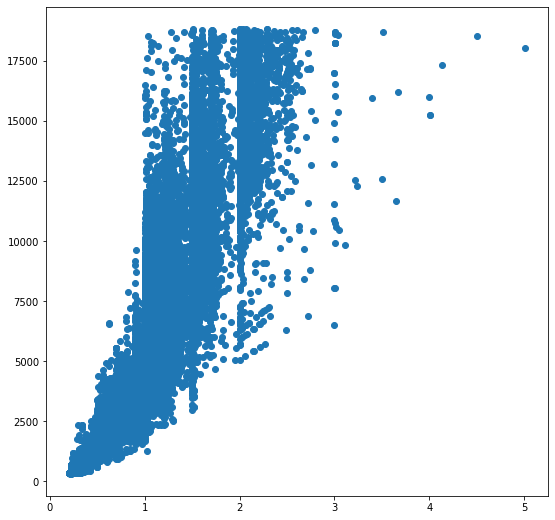

In [134]:
import numpy as np
import matplotlib.pyplot as plt
x=diamonds['carat']
y=diamonds['price']

#Para fazer maior
plt.figure(figsize=(9,9))
plt.scatter(x,y)
plt.show()

Pode-se utilizar também a biblioteca Seaborn para representar esses dados. Nesse caso as variáveis são tratadas diretamente nos argumentos porque o dataset pode ser declarado.

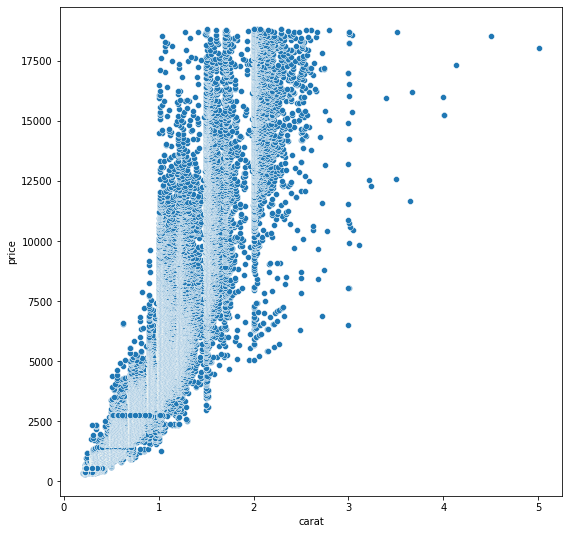

In [135]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=diamonds, x="carat", y="price")
plt.show()

Utilizando o parâmetro *hue* podemos analisar os dados por variável categórica. Por exemplo, corte.

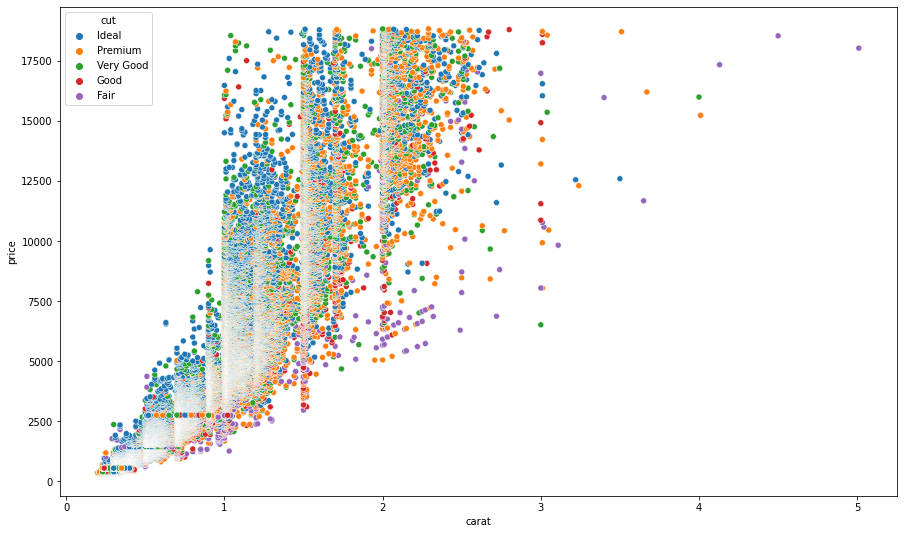

In [62]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=diamonds, x="carat", y="price",hue='cut')
plt.show()

Podemos filtrar o dataset com os mesmos comandos aprendidos para melhorar a visualização.

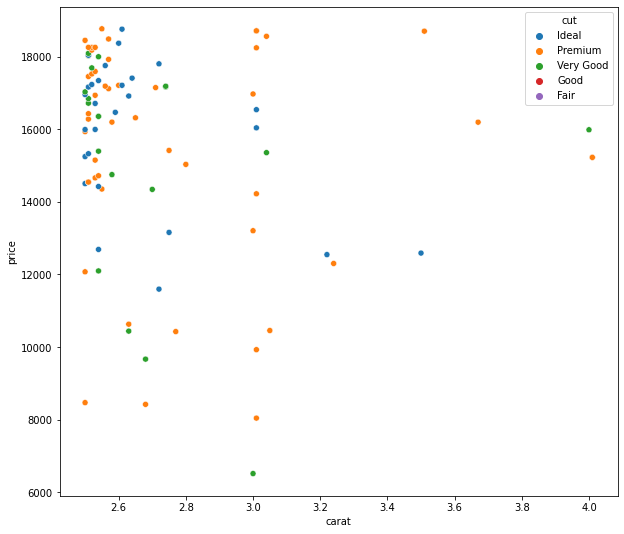

In [65]:
plt.figure(figsize=(10,9))
sns.scatterplot(data=diamonds.query('(carat > =2.5 & carat <=5) &(cut=="Ideal"\
             | cut=="Premium" | cut=="Very Good")'),
             x="carat", y="price",hue='cut')
plt.show()

### **Boxplot**

Gráfico que mostra a estatística descritiva de um conjunto de dados em um gráfico. Mínimo, Máximo, Mediana, Primeiro e Terceiro quartis, assim como dados discrepantes (*outliers*). [Mais informações](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

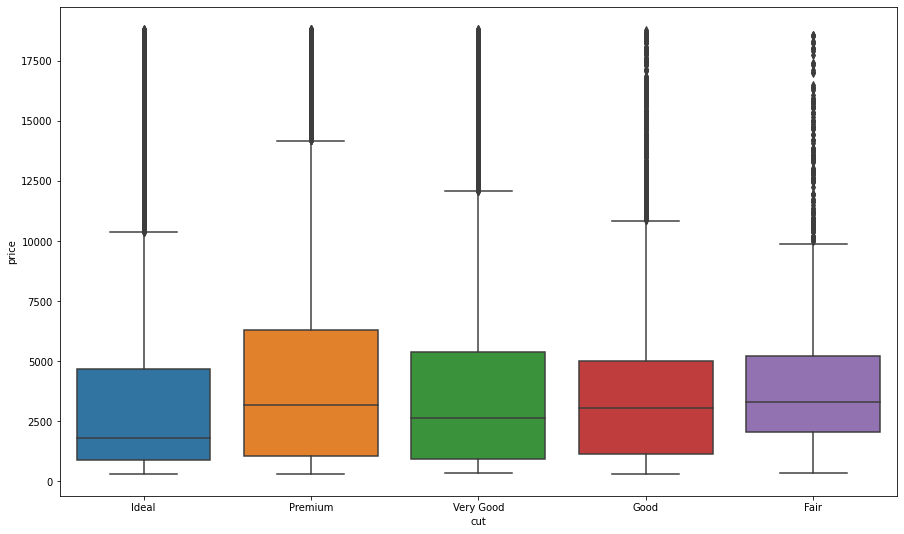

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(data=diamonds,x='cut',y='price')
plt.show()

Para ter uma ideia do IQR (*InterQuantile Range*), vamos olhar a estatística descritiva dos preços dos diamantes premium.

In [136]:
diamonds.query('cut=="Premium"')['price'].describe()

count    13791.000000
mean      4584.257704
std       4349.204961
min        326.000000
25%       1046.000000
50%       3185.000000
75%       6296.000000
max      18823.000000
Name: price, dtype: float64

In [137]:
(diamonds.query('cut=="Premium"')['price'].quantile(0.75)\
-diamonds.query('cut=="Premium"')['price'].quantile(0.25))*1.5\
 + diamonds.query('cut=="Premium"')['price'].quantile(0.75)

14171.0

Tambem podemos aplicar o Hue ao boxplot.

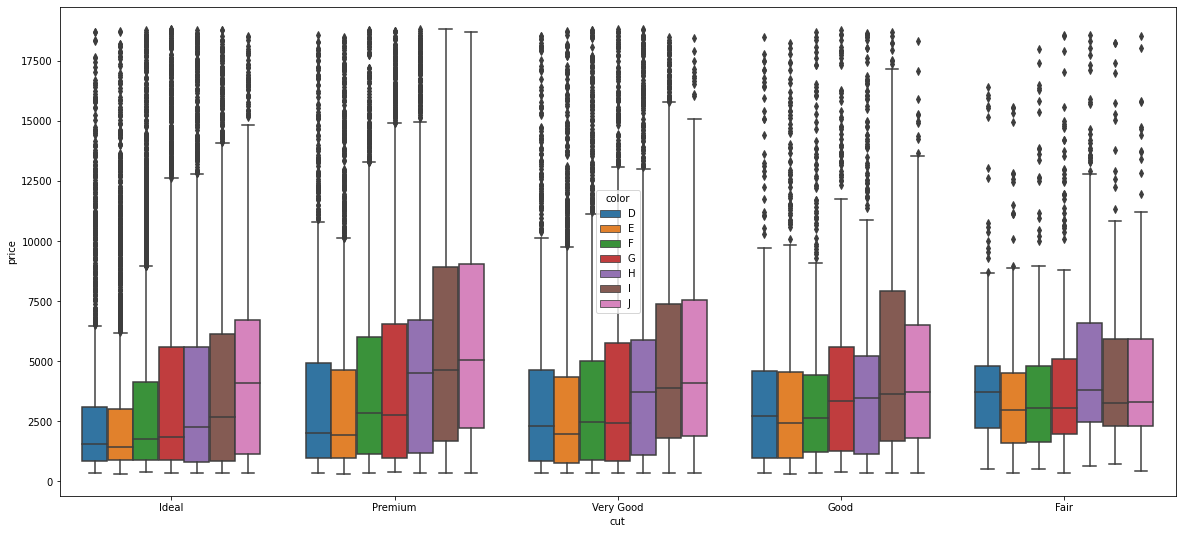

In [138]:
plt.figure(figsize=(20,9))
sns.boxplot(data=diamonds,x='cut',y='price',hue='color')
plt.show()

### **Histograma**

Gráfico com barras que mostra a estatística de uma variável quantitativa em faixas de valores. Utilizaremos um boxplot para visualizar em conjunto.[Mais informações](https://seaborn.pydata.org/generated/seaborn.histplot.html)

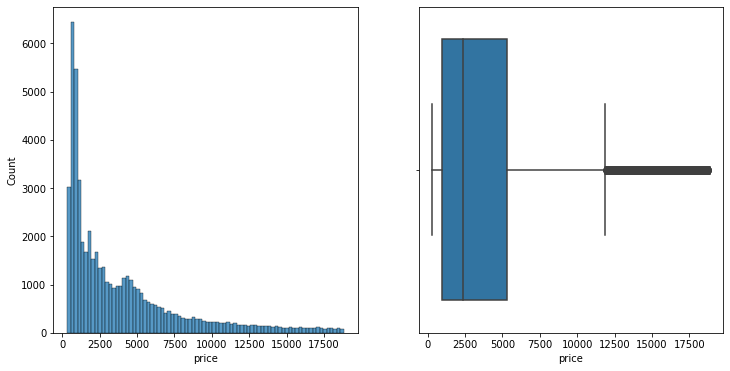

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(ax=axes[0],data=diamonds,x='price')
sns.boxplot(ax=axes[1],data=diamonds,x='price')
plt.show()

Também podemos utilizar o *hue* para mesclar histogramas.

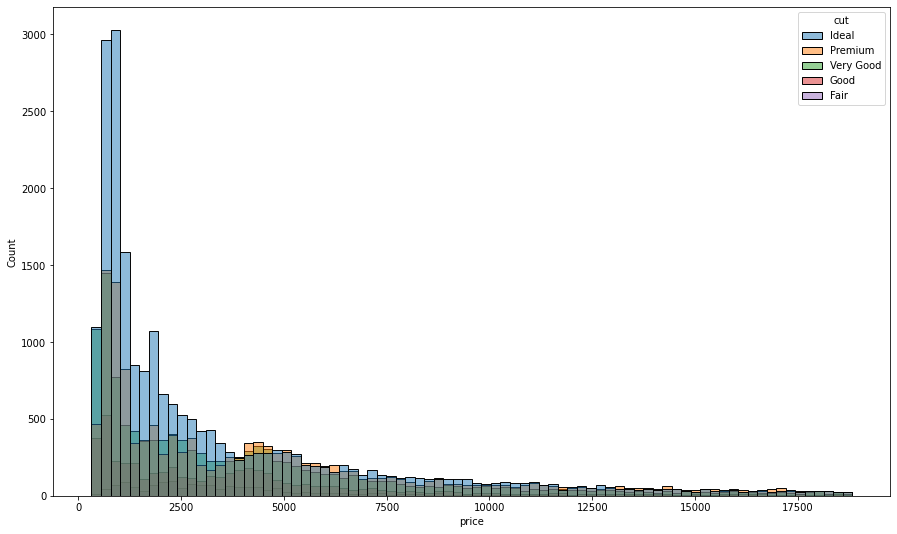

In [ ]:
plt.figure(figsize=(15,9))
sns.histplot(data=diamonds,hue='cut',x='price')
plt.show()

Você pode determinar a estatística a ser utilizada no histograma.

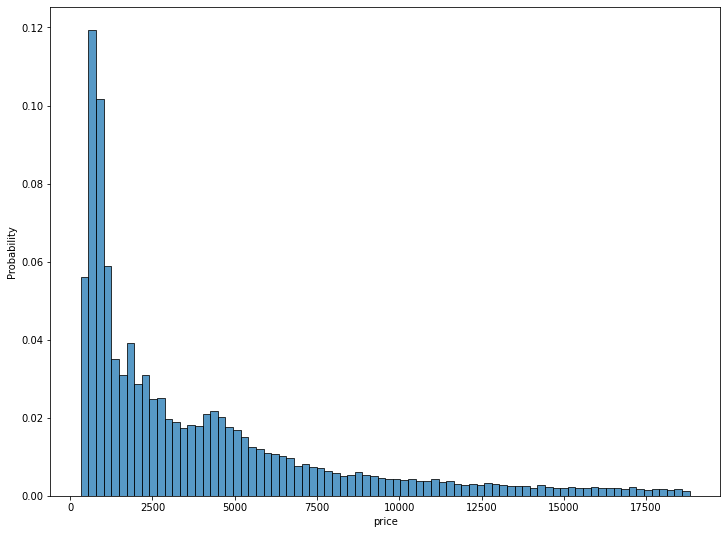

In [67]:
plt.figure(figsize=(12,9))
sns.histplot(data=diamonds,x='price',stat='probability')
plt.show()

### **Barplot** 

Um gráfico de barras desenhar valores para um estimador (a média é o padrão) dos valores *y* para as variáveis categórias do eixo *x*. Vamos utilizar corte e preço mais uma vez. [Mais informações](https://seaborn.pydata.org/generated/seaborn.barplot.html)

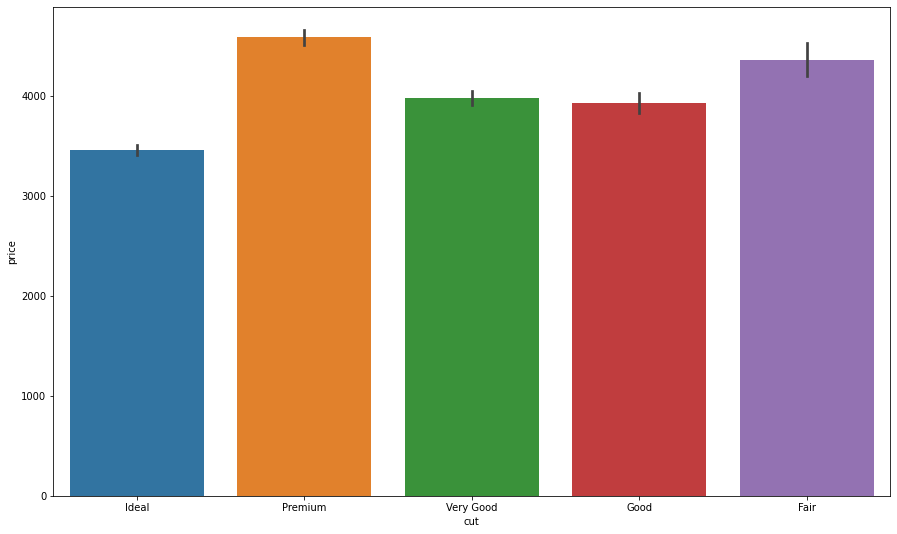

In [ ]:
plt.figure(figsize=(15,9))
sns.barplot(data=diamonds,x='cut',y='price')
plt.show()

Agora, vamos inserir a cor como opção para especificar o barplot.

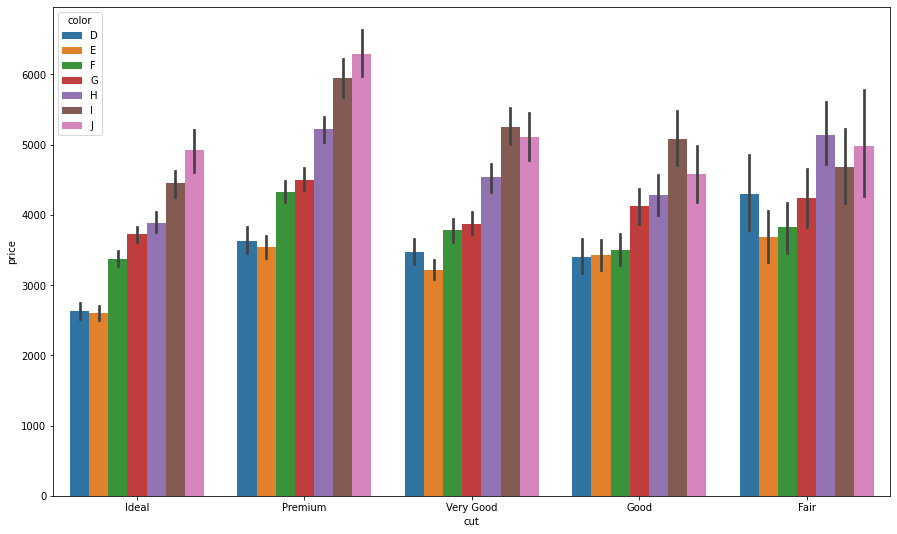

In [ ]:
plt.figure(figsize=(15,9))
sns.barplot(data=diamonds,x='cut',y='price',hue='color')
plt.show()

Mudando o estimador, utilizando a mediana. Precisamos importar a função mediana do Numpy.

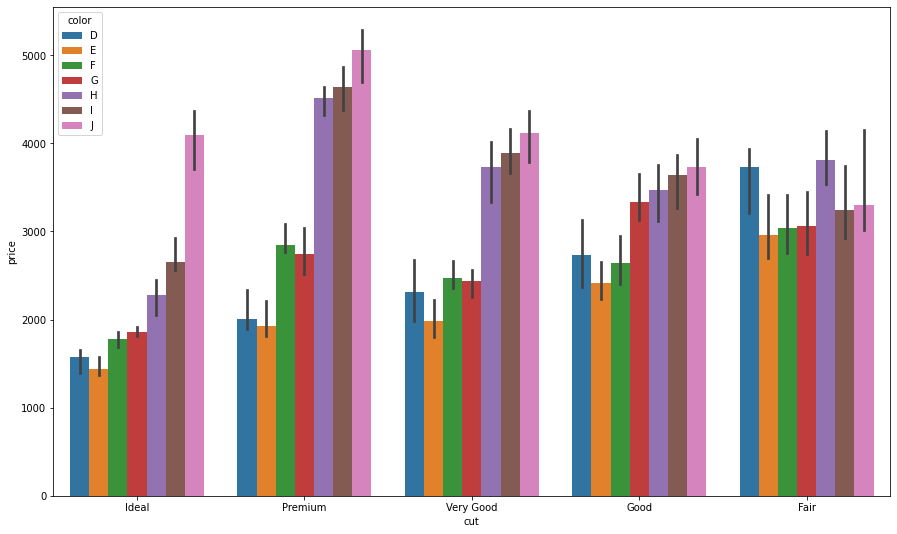

In [ ]:
plt.figure(figsize=(15,9))
sns.barplot(data=diamonds,x='cut',y='price',hue='color',estimator=np.median)
plt.show()

## Alterando e criando variáveis.

Algumas variáveis categóricas tem valores que podem não fazer sentido. Vamos recapitular.

In [140]:
for i in ['cut','color','clarity']:
    print(diamonds[i].unique())


['Ideal', 'Premium', 'Bom', 'Muito Bom', 'Normal']
Categories (5, object): ['Ideal', 'Premium', 'Bom', 'Muito Bom', 'Normal']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['E', 'I', 'J', 'H', 'F', 'G', 'D']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


Caso queira alterar os valores de alguma variável categórica, pode-se usar o método .cat.rename_categories e passar um dicionário mapeando as mudanças. Por exemplo, *cut*:

In [139]:
diamonds['cut']=diamonds['cut'].cat.rename_categories({'Good':'Bom','Very Good':'Muito Bom','Fair':'Normal'})
diamonds['cut'].unique()

['Ideal', 'Premium', 'Bom', 'Muito Bom', 'Normal']
Categories (5, object): ['Ideal', 'Premium', 'Bom', 'Muito Bom', 'Normal']

A densidade de um diamante é de aproximadamente $3.5 \; gr/cm^3$. Um quilate é aproximadamente $200mg=0.2gr$. Então, baseado nessa informação, o volume de um diamante em função do quilate é: 
$$V=200q/3.5$$
Podemos criar a variável *volume* no nosso dataset de modo que tenha o cálculo desse volume.

In [74]:
diamonds['volume']=(diamonds['carat']*0.2*1000)/3.5
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,13.142857
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,12.000000
2,0.23,Bom,E,VS1,56.9,65.0,327,4.05,4.07,2.31,13.142857
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,16.571429
4,0.31,Bom,J,SI2,63.3,58.0,335,4.34,4.35,2.75,17.714286


In [75]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
 10  volume   53940 non-null  float64 
dtypes: category(3), float64(7), int64(1)
memory usage: 3.4 MB


#O problema da lista de notas

[Texto Importante: Tidy Data](https://github.com/FilipeLima/Intro-Pandas/blob/main/tidydata.pdf)

Você recebe um dataset com informações sobre notas de alunos em algumas disciplinas. Pede-se:

<ul>
<li>Fazer a análise descritiva das notas por turma e por semestre.</li>
<li>Fazer a análise descritiva dos faltantes por turma e por semestre.</li>
<li>Percentualmente, nos casos quem têm a situação Reprovado por Falta (RF), qual verificação de aprendizagem têm mais faltantes?</li>
<li>Especificar mais a situação final do aluno. Indicar se o aluno foi aprovado de segunda, de terceira, se reprovou direto (sem final), se reprovou por falta, se faltou à final, se foi aprovado na final.</li>
<li>Comparar a situação final entre os alunos de Cálculo I de Química e Economia.</li>
</ul>

## Informações sobre o dataset

O dataset possui 12 colunas e representa um estudante e suas respectivas notas, médias e situação final em uma disciplina no ano, semestre e turma. Quando um aluno falta a avaliação, recebe a nota "F". A média é calculada pela média das duas maiores notas das 3 VAs. Se a média não for maior que 7, for maior que 3 e o estudante faz ao menos 2 provas, ele vai fazer a final. Para ser aprovado, a média entre a média e a nota da final tem que ser maior que 5. A situação é AM - Aprovado por Média, AP - Aprovado, RF - Reprovado por Falta e RP - Reprovado.

In [142]:
notas=pd.read_excel('notas_final.xlsx')
notas.head(10)

,CHAMADA,1VA,2VA,3VA,MEDIA,VAFN,MFIN,SIT,ANO,SEMESTRE,TURMA,DISCIPLINA
0,1,3,F,F,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
1,2,0.5,2.4,1,1.70,NaN,1.70,RP,2018,1,LQ1,Matemática Básica
2,3,7,10,NaN,8.50,NaN,8.50,AM,2018,1,LQ1,Matemática Básica
3,4,F,F,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
4,5,10,9.5,NaN,9.75,NaN,9.75,AM,2018,1,LQ1,Matemática Básica
5,6,10,10,NaN,10.00,NaN,10.00,AM,2018,1,LQ1,Matemática Básica
6,7,10,8.4,NaN,9.20,NaN,9.20,AM,2018,1,LQ1,Matemática Básica
7,8,F,F,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
8,9,F,F,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
9,10,3.5,2.4,5.7,4.60,6.5,5.55,AP,2018,1,LQ1,Matemática Básica


In [79]:
#from google.colab import drive
#drive.mount('/content/drive')
#notas1=pd.read_excel("./drive/MyDrive/notas_final.xlsx")
#notas1.head()

,CHAMADA,1VA,2VA,3VA,MEDIA,VAFN,MFIN,SIT,ANO,SEMESTRE,TURMA,DISCIPLINA
0,1,3,F,F,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
1,2,0.5,2.4,1,1.70,NaN,1.70,RP,2018,1,LQ1,Matemática Básica
2,3,7,10,NaN,8.50,NaN,8.50,AM,2018,1,LQ1,Matemática Básica
3,4,F,F,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
4,5,10,9.5,NaN,9.75,NaN,9.75,AM,2018,1,LQ1,Matemática Básica


Quais tipos de dados possuem cada coluna do dataset?

In [143]:
notas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CHAMADA     470 non-null    int64  
 1   1VA         470 non-null    object 
 2   2VA         470 non-null    object 
 3   3VA         248 non-null    object 
 4   MEDIA       329 non-null    float64
 5   VAFN        78 non-null     object 
 6   MFIN        329 non-null    float64
 7   SIT         470 non-null    object 
 8   ANO         470 non-null    int64  
 9   SEMESTRE    470 non-null    int64  
 10  TURMA       470 non-null    object 
 11  DISCIPLINA  470 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 44.2+ KB


## Problemas do Dataset


Vamos tentar analisar algumas variáveis.

In [144]:
notas['1VA'].describe()

count     470
unique     32
top        10
freq      125
Name: 1VA, dtype: int64

In [145]:
notas['3VA'].describe()

count     248
unique     29
top         F
freq      108
Name: 3VA, dtype: object

In [146]:
notas['MFIN'].describe()

count    329.000000
mean       7.522644
std        2.220355
min        0.000000
25%        7.000000
50%        8.000000
75%        9.250000
max       10.000000
Name: MFIN, dtype: float64

Outro problema é a quantidade de elementos nulos, por exemplo, na coluna MEDIA. E esses elementos nulos (em branco) não podem ser retirados do dataset.

In [147]:
notas[pd.isnull(notas['MEDIA'])]

,CHAMADA,1VA,2VA,3VA,MEDIA,VAFN,MFIN,SIT,ANO,SEMESTRE,TURMA,DISCIPLINA
0,1,3,F,F,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
3,4,F,F,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
7,8,F,F,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
8,9,F,F,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
13,14,0,F,F,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
...,...,...,...,...,...,...,...,...,...,...,...,...
463,21,F,F,F,NaN,NaN,NaN,RF,2020,1,ER1,Cálculo II
465,23,F,F,F,NaN,NaN,NaN,RF,2020,1,ER1,Cálculo II
467,25,F,F,F,NaN,NaN,NaN,RF,2020,1,ER1,Cálculo II
468,26,F,F,F,NaN,NaN,NaN,RF,2020,1,ER1,Cálculo II


O que acontece ao calcular a média das médias:

In [149]:
np.mean(notas['MEDIA'])

7.406686930091189

Média das primeiras VA

In [87]:
#np.mean(notas['1VA'])

TypeError: ignored

O método .dropna() permite retirar todas as linhas que contém um 'NaN'. 

In [150]:
notas_retiradas=notas.dropna()
notas_retiradas

,CHAMADA,1VA,2VA,3VA,MEDIA,VAFN,MFIN,SIT,ANO,SEMESTRE,TURMA,DISCIPLINA
9,10,3.5,2.4,5.7,4.60,6.5,5.55,AP,2018,1,LQ1,Matemática Básica
20,21,4.5,7.2,5,6.10,9,7.55,AP,2018,1,LQ1,Matemática Básica
25,26,8.5,3.9,3.25,6.20,4,5.10,AP,2018,1,LQ1,Matemática Básica
26,27,6,3.6,6.5,6.25,5.5,5.88,AP,2018,1,LQ1,Matemática Básica
33,34,3,6,5,5.50,6.5,6.00,AP,2018,1,LQ1,Matemática Básica
...,...,...,...,...,...,...,...,...,...,...,...,...
430,21,3,5,5,5.00,8,6.50,AP,2020,1,LQ1,Matemática Básica
436,27,6,3,5,5.50,4.5,5.00,AP,2020,1,LQ1,Matemática Básica
460,18,6,5,5,5.50,7,6.25,AP,2020,1,ER1,Cálculo II
464,22,4,5,4,4.50,6,5.25,AP,2020,1,ER1,Cálculo II


Uma das consequências dessa retirada é a seguinte: 

In [151]:
notas_retiradas['SIT'].unique()

array(['AP', 'RP', 'RF'], dtype=object)

O método .fillna permite preencher os espaços nulos. O que substitui os espaços nulos pode ser qualquer coisa, como a média.

In [152]:
media_da_media=np.mean(notas['MEDIA'])
notas['MEDIA'].fillna(media_da_media)

0      7.406687
1      1.700000
2      8.500000
3      7.406687
4      9.750000
         ...   
465    7.406687
466    5.500000
467    7.406687
468    7.406687
469    7.406687
Name: MEDIA, Length: 470, dtype: float64

Em resumo: Não podemos tirar as linhas com NaN, não podemos tirar as faltas e as notas estão em formato de string por causa das faltas.

## Organizando os dados

Quais decisões tomar?

Primeiro, renomear as colunas, para ter títulos mais descritivos.

In [153]:
notas.columns

Index(['CHAMADA', '1VA', '2VA', '3VA', 'MEDIA', 'VAFN', 'MFIN', 'SIT', 'ANO',
       'SEMESTRE', 'TURMA', 'DISCIPLINA'],
      dtype='object')

In [154]:
notas.columns=['chamada','va1','va2','va3','media','final','mediaFinal',
               'situacao','ano','semestre','turma','disciplina']
               

Contornando o problema da Falta. Trocando "F" por um número negativo alto.

In [155]:
notas=notas.replace(to_replace='F',value=-100)
notas.head()

,chamada,va1,va2,va3,media,final,mediaFinal,situacao,ano,semestre,turma,disciplina
0,1,3.0,-100.0,-100.0,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
1,2,0.5,2.4,1.0,1.70,NaN,1.70,RP,2018,1,LQ1,Matemática Básica
2,3,7.0,10.0,NaN,8.50,NaN,8.50,AM,2018,1,LQ1,Matemática Básica
3,4,-100.0,-100.0,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
4,5,10.0,9.5,NaN,9.75,NaN,9.75,AM,2018,1,LQ1,Matemática Básica


Olhando mais uma vez os tipos de dados do dataframe, temos

In [156]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   chamada     470 non-null    int64  
 1   va1         470 non-null    float64
 2   va2         470 non-null    float64
 3   va3         248 non-null    float64
 4   media       329 non-null    float64
 5   final       78 non-null     float64
 6   mediaFinal  329 non-null    float64
 7   situacao    470 non-null    object 
 8   ano         470 non-null    int64  
 9   semestre    470 non-null    int64  
 10  turma       470 non-null    object 
 11  disciplina  470 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 44.2+ KB


Precisamos converter os 'object' em dados categóricos. Auxilia no uso da memória e na hora de utilizar outras bibliotecas de dados.

In [157]:
for i in ['situacao','turma','disciplina']:
    notas[i]=notas[i].astype('category')

notas.dtypes

chamada          int64
va1            float64
va2            float64
va3            float64
media          float64
final          float64
mediaFinal     float64
situacao      category
ano              int64
semestre         int64
turma         category
disciplina    category
dtype: object

## Respondendo às perguntas



Fazer a análise descritiva das notas por disciplina, turma e semestre.

In [158]:
notasVa1=notas[notas['va1']>=0].loc[:,['disciplina','turma','ano','semestre','va1']]
notasVa1

,disciplina,turma,ano,semestre,va1
0,Matemática Básica,LQ1,2018,1,3.0
1,Matemática Básica,LQ1,2018,1,0.5
2,Matemática Básica,LQ1,2018,1,7.0
4,Matemática Básica,LQ1,2018,1,10.0
5,Matemática Básica,LQ1,2018,1,10.0
...,...,...,...,...,...
460,Cálculo II,ER1,2020,1,6.0
462,Cálculo II,ER1,2020,1,6.0
464,Cálculo II,ER1,2020,1,4.0
466,Cálculo II,ER1,2020,1,2.0


Agora vamos agrupar esse resultado.

In [159]:
notasVa1.groupby(['ano','semestre','turma','disciplina'])['va1'].describe()

count      mean  ...     75%   max
ano  semestre turma disciplina                          ...              
2016 1        LQ1   Cálculo II          31.0  5.790323  ...   9.375  10.0
     2        ER1   Cálculo II          31.0  8.693548  ...  10.000  10.0
              LQ1   Matemática Básica   46.0  6.597826  ...  10.000  10.0
2017 1        ER1   Cálculo I           50.0  6.680000  ...  10.000  10.0
              LQ1   Cálculo I           32.0  7.781250  ...  10.000  10.0
     2        ER1   Cálculo II          43.0  7.168605  ...  10.000  10.0
              LQ1   Cálculo II          35.0  8.057143  ...  10.000  10.0
2018 1        LQ1   Matemática Básica   39.0  6.653846  ...  10.000  10.0
     2        LQ1   Cálculo I           36.0  5.513889  ...   8.500  10.0
2020 1        ER1   Cálculo II          10.0  3.200000  ...   3.750   6.0
              LQ1   Matemática Básica    8.0  4.000000  ...   5.250   8.0
              SP1   Matemática III       4.0  5.000000  ...   5.500  10.0

[12 rows x 8 columns]

Podemos automatizar esse processo?

In [160]:
for i in ['va1','va2','va3','final']:
    print(notas[notas[i]>=0].loc[:,['disciplina','turma','ano','semestre',i]
                                 ].groupby(['ano','semestre','turma',
                                            'disciplina'])[i].describe().to_string(float_format='%.2f'))

                                       count  mean  std  min  25%   50%   75%   max
ano  semestre turma disciplina                                                     
2016 1        LQ1   Cálculo II         31.00  5.79 3.55 0.00 2.00  5.75  9.38 10.00
     2        ER1   Cálculo II         31.00  8.69 2.55 0.00 9.00 10.00 10.00 10.00
              LQ1   Matemática Básica  46.00  6.60 3.58 0.00 4.00  7.50 10.00 10.00
2017 1        ER1   Cálculo I          50.00  6.68 3.28 1.00 4.00  7.00 10.00 10.00
              LQ1   Cálculo I          32.00  7.78 2.81 1.00 6.38  8.75 10.00 10.00
     2        ER1   Cálculo II         43.00  7.17 3.00 0.00 5.50  8.00 10.00 10.00
              LQ1   Cálculo II         35.00  8.06 2.27 2.00 6.50  9.00 10.00 10.00
2018 1        LQ1   Matemática Básica  39.00  6.65 3.29 0.00 4.50  7.50 10.00 10.00
     2        LQ1   Cálculo I          36.00  5.51 3.10 0.00 2.88  6.00  8.50 10.00
2020 1        ER1   Cálculo II         10.00  3.20 1.62 2.00 2.00  2.50  3.7

Fazer a análise descritiva dos faltantes por turma e por semestre.

 No nosso caso como só temos as faltas, vamos fazer uma contagem simples e agrupar com o método aggregate().

In [163]:
for i in ['va1','va2','va3','final']:
    print(notas[notas[i]<0].loc[:,['disciplina','turma','ano','semestre',i]
                                 ].groupby(['ano','semestre','turma',
                                            'disciplina'])[i].aggregate(len).dropna())

ano   semestre  turma  disciplina       
2016  1         LQ1    Cálculo II            3.0
      2         ER1    Cálculo II            3.0
                LQ1    Matemática Básica    11.0
2017  1         ER1    Cálculo I             8.0
                LQ1    Cálculo I             8.0
      2         ER1    Cálculo II            3.0
                LQ1    Cálculo II            3.0
2018  1         LQ1    Matemática Básica     9.0
      2         LQ1    Cálculo I             1.0
2020  1         ER1    Cálculo II           17.0
                LQ1    Matemática Básica    25.0
                SP1    Matemática III       14.0
Name: va1, dtype: float64
ano   semestre  turma  disciplina       
2016  1         LQ1    Cálculo II            5.0
      2         ER1    Cálculo II            9.0
                LQ1    Matemática Básica    25.0
2017  1         ER1    Cálculo I            12.0
                LQ1    Cálculo I            10.0
      2         ER1    Cálculo II            5.0
2018  1   

Percentualmente, nos casos quem têm a situação Reprovado por Falta (RF), qual verificação de aprendizagem têm mais faltantes? Primeiro, filtraremos só os alunos reprovados. 

In [164]:
reprovadosPorFalta =notas[notas['situacao']=='RF']
reprovadosPorFalta.head()


,chamada,va1,va2,va3,media,final,mediaFinal,situacao,ano,semestre,turma,disciplina
0,1,3.0,-100.0,-100.0,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
3,4,-100.0,-100.0,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
7,8,-100.0,-100.0,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
8,9,-100.0,-100.0,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica
13,14,0.0,-100.0,-100.0,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica


In [165]:
#Calculando a quantidade de faltantes em cada VA
vas=['va1','va2','va3']
totalReprovados=reprovadosPorFalta.shape[0]
for i in vas:
    print(100*reprovadosPorFalta[reprovadosPorFalta[i]==-100].shape[0]/totalReprovados)

67.6056338028169
97.88732394366197
70.4225352112676


Especificar mais a situação final do aluno. Indicar se o aluno foi aprovado de segunda, de terceira, se reprovou direto (sem final), se reprovou por falta, se faltou à final, se foi aprovado na final.

In [166]:
situacao=[]
for x in notas.index:
  va1=notas.loc[x,'va1']
  va2=notas.loc[x,'va2']
  va3=notas.loc[x,'va3']
  vafn=notas.loc[x,'final']
  media=notas.loc[x,'media']
  mediafinal=notas.loc[x,'mediaFinal']
  VAF=[va1,va2,va3].count(-100)
  if (VAF>=2):
    situacao.append("Reprovado por Falta")
  elif (vafn==-100):
    situacao.append("Faltou à Final")
  elif (mediafinal<5 and vafn>=0):
    situacao.append('Reprovou na Final')
  elif (media<3):
    situacao.append("Reprovou Direto")
  elif (mediafinal>=5 and vafn>=0):
    situacao.append("Aprovado na Final")
  elif ((va1+va2)/2>=7):
    situacao.append("Aprovado de Segunda")
  elif (media>=7 and (va1+va2)/2<7):
    situacao.append("Aprovado de Terceira")
  else:
    situacao.append('Erro')

notas['sitExtendida']=situacao
notas.head()

,chamada,va1,va2,va3,media,final,mediaFinal,situacao,ano,semestre,turma,disciplina,sitExtendida
0,1,3.0,-100.0,-100.0,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica,Reprovado por Falta
1,2,0.5,2.4,1.0,1.70,NaN,1.70,RP,2018,1,LQ1,Matemática Básica,Reprovou Direto
2,3,7.0,10.0,NaN,8.50,NaN,8.50,AM,2018,1,LQ1,Matemática Básica,Aprovado de Segunda
3,4,-100.0,-100.0,NaN,NaN,NaN,NaN,RF,2018,1,LQ1,Matemática Básica,Reprovado por Falta
4,5,10.0,9.5,NaN,9.75,NaN,9.75,AM,2018,1,LQ1,Matemática Básica,Aprovado de Segunda


Comparar a situação final entre os alunos de Cálculo I de Química e Economia.

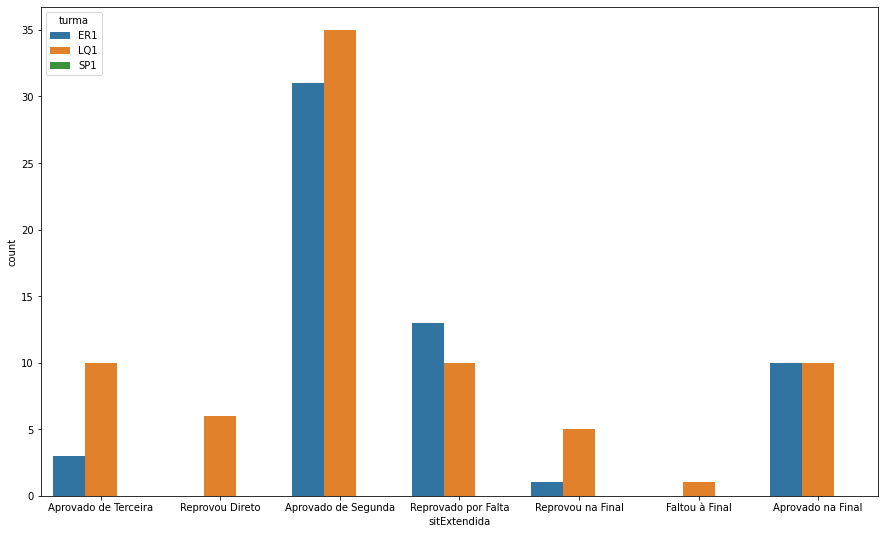

In [167]:
plt.figure(figsize=(15,9))
notasCalculo=notas[(notas['disciplina']=="Cálculo I")]
#Utilizando um countplot para contar as variáveis
sns.countplot(data=notasCalculo,x='sitExtendida',hue='turma')
plt.show()

Tentaremos comparar percentualmente e utilizaremos o método .concat().

In [168]:
#Separo a situação extendida por turma LQ1 Percentualmente
calculoQuimica=notasCalculo.query("turma=='LQ1' ")['sitExtendida'].value_counts()*100/(
    notasCalculo.query("turma=='LQ1' ").shape[0])

#Separo a situação extendida por turma ER1 Percentualmente
calculoEconomia=notasCalculo.query("turma=='ER1' ")['sitExtendida'].value_counts()*100/(
    notasCalculo.query("turma=='ER1' ").shape[0])

#Usar o concat pra juntar as duas listas pelo índice
pd.concat([calculoQuimica, calculoEconomia.reindex(
    calculoQuimica.index)], axis=1)

,sitExtendida,sitExtendida
Aprovado de Segunda,45.454545,53.448276
Reprovado por Falta,12.987013,22.413793
Aprovado na Final,12.987013,17.241379
Aprovado de Terceira,12.987013,5.172414
Reprovou Direto,7.792208,NaN
Reprovou na Final,6.493506,1.724138
Faltou à Final,1.298701,NaN


# Regressões Lineares

Utilizaremos o [Banco de dados da OCDE](https://data.oecd.org/agroutput/crop-production.htm) sobre safras de arroz, milho, soja e trigo anual em alguns países. Mais informações no [Kaggle](https://www.kaggle.com/vagifa/worldwide-crop-production).


## Colheita anual

In [169]:
#Ler o arquivo de colheita
crop = pd.read_csv("worldwide_crop_consumption.csv")
crop

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,1990,5.374114
1,AUS,RICE,TONNE_HA,1991,5.897753
2,AUS,RICE,TONNE_HA,1992,5.903150
3,AUS,RICE,TONNE_HA,1993,5.221311
4,AUS,RICE,TONNE_HA,1994,5.457576
...,...,...,...,...,...
21160,EU28,SOYBEAN,TONNE_HA,2022,2.897405
21161,EU28,SOYBEAN,TONNE_HA,2023,2.903548
21162,EU28,SOYBEAN,TONNE_HA,2024,2.915203
21163,EU28,SOYBEAN,TONNE_HA,2025,2.919959


Vamos analisar as variáveis.

In [170]:
for i in range(4):
    print(crop.iloc[:,i].unique())

print(crop.dtypes)
print(crop.columns)

['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'IND' 'IDN' 'IRN' 'KAZ' 'MYS' 'MOZ'
 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA' 'THA' 'UKR'
 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'NOR' 'CHE' 'EU28' 'ISR'
 'HTI']
['RICE' 'WHEAT' 'MAIZE' 'SOYBEAN']
['TONNE_HA' 'THND_TONNE' 'THND_HA']
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024 2025 2026]
LOCATION     object
SUBJECT      object
MEASURE      object
TIME          int64
Value       float64
dtype: object
Index(['LOCATION', 'SUBJECT', 'MEASURE', 'TIME', 'Value'], dtype='object')


Começar renomeando as variáveis e objetos.

In [172]:
crop.columns =['pais','cereal','medida',"ano",'valor']
crop['cereal']=crop['cereal'].replace({'RICE':'arroz','WHEAT':'trigo',
                                      'MAIZE':'milho','SOYBEAN':'soja'})
crop['medida']=crop['medida'].replace({'TONNE_HA':"Toneladas por hectare",
                                      "THND_TONNE":"Milhares de Toneladas",
                                      'THND_HA':"Milhares de Hectares"})
crop['pais']=crop['pais'].replace({'BRA':"Brasil",'USA':'EUA','RUS':'Russia',
                                  'UKR':"Ucrania",'CHN':'China'})                                                                          
crop                                  

,pais,cereal,medida,ano,valor
0,AUS,arroz,Toneladas por hectare,1990,5.374114
1,AUS,arroz,Toneladas por hectare,1991,5.897753
2,AUS,arroz,Toneladas por hectare,1992,5.903150
3,AUS,arroz,Toneladas por hectare,1993,5.221311
4,AUS,arroz,Toneladas por hectare,1994,5.457576
...,...,...,...,...,...
21160,EU28,soja,Toneladas por hectare,2022,2.897405
21161,EU28,soja,Toneladas por hectare,2023,2.903548
21162,EU28,soja,Toneladas por hectare,2024,2.915203
21163,EU28,soja,Toneladas por hectare,2025,2.919959


Agora vamos tranformar os objetos em variáveis categóricas.

In [173]:
for i in ['pais','cereal','medida']:
    crop[i]=crop[i].astype('category')
crop.dtypes

pais      category
cereal    category
medida    category
ano          int64
valor      float64
dtype: object

Vamos ver o gráfico dessas variáveis para o Brasil. Primeiro, filtrando o dataset. Aproveitar para inserir variáveis em um .query().

In [175]:
medida='Milhares de Hectares'
pais='Brasil'
#Vamos utilizar a @ para passar a variável dentro do query
brasil=crop.query('pais==@pais & medida==@medida & ano<2017')
brasil


,pais,cereal,medida,ano,valor
4955,Brasil,arroz,Milhares de Hectares,1990,4180.0
4956,Brasil,arroz,Milhares de Hectares,1991,4232.0
4957,Brasil,arroz,Milhares de Hectares,1992,4614.0
4958,Brasil,arroz,Milhares de Hectares,1993,4385.0
4959,Brasil,arroz,Milhares de Hectares,1994,4391.0
...,...,...,...,...,...
14852,Brasil,milho,Milhares de Hectares,2012,14226.0
14853,Brasil,milho,Milhares de Hectares,2013,15317.0
14854,Brasil,milho,Milhares de Hectares,2014,15432.0
14855,Brasil,milho,Milhares de Hectares,2015,15406.0


Agora plotando o gráfico.

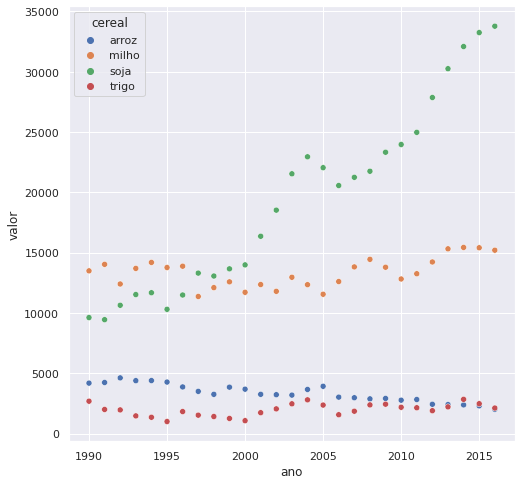

In [176]:
plt.figure(figsize=(8,8))
sns.set_theme()
sns.scatterplot(x='ano',y='valor',data=brasil,hue='cereal')
plt.show()

## Regressões Lineares

### O Método dos Mínimos Quadrados

Vamos olhar o gráfico do milho para o Brasil na medida de toneladas por hectare.

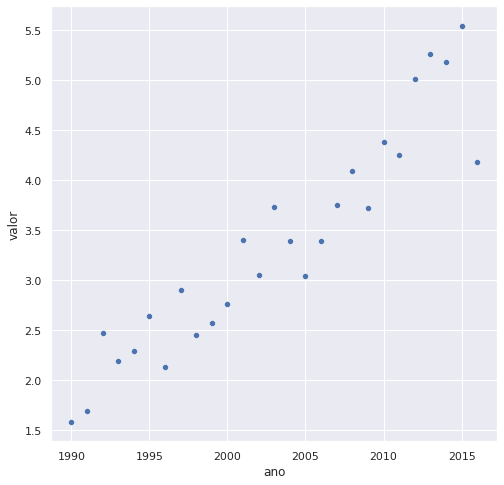

In [177]:
medida='Toneladas por hectare'
pais='Brasil'
cereal='milho'
brasilCereal=crop.query('pais==@pais & medida==@medida & ano<2017 & cereal==@cereal')

plt.figure(figsize=(8,8))

sns.scatterplot(x='ano',y='valor',data=brasilCereal)
plt.show()

Suponha que $A=\{(x_{1},y_{1}),(x_{2},y_{2}),...,(x_{n},y_{n})\}$ seja o nosso conjunto de $n$ pontos representado no gráfico acima. Queremos encontrar uma reta $f(x)=ax+b, x \in \mathbb{R}$ de modo que a soma das distâncias quadradas entre o ponto $(x_{i},\hat{y}_{i}=ax_{i}+b)$ e o ponto $(x_{i},y_{i})$, para todo $i \in [1,n]$ seja a menor possível.

O raciocínio segue da seguinte maneira: Chamaremos da soma das distâncias quadradas de $D$, assim:

$$D(a,b)=\displaystyle\sum_{i}^{n}((x_{i},\hat{y}_{i})-(x_{i},y_{i}))^2=\sum_{i}^{n}(\hat{y}_{i}-y_{i})^2=\sum_{i}^{n}(ax_{i}+b-y_{i})^2$$

Assim, derivaremos em função do coeficiente $a$ e do coeficiente $b$ e igualaremos a zero.

$$\displaystyle\frac{\partial D(a,b)}{\partial a}=2.\sum_{i}^{n}x_{i}(ax_{i}+b-y_{i})=0$$
$$\displaystyle\frac{\partial D(a,b)}{\partial b}=2.\sum_{i}^{n}(ax_{i}+b-y_{i})=0$$

Seguindo,

$$\displaystyle 2.\sum_{i}^{n}x_{i}(ax_{i}+b-y_{i})=0$$
$$\displaystyle 2.\sum_{i}^{n}(ax_{i}+b-y_{i})=0$$


Dividindo a segunda equação po $2n$, temos:

$$\displaystyle \frac{a\sum_{i}^{n}x_{i}}{n}+\frac{b\sum_{i}^{n}1}{n}-\frac{\sum_{i}^{n}y_{i}}{n}=0$$

Utilizando a notação de média da amostra, e isolando o $b$, temos:  

$$a\bar{x}+b-\bar{y}=0\Rightarrow b=\bar{y}-a\bar{x}$$

Substituindo na primeira equação, temos

$$\displaystyle \sum_{i}^{n}x_{i}(ax_{i}+\bar{y}-a\bar{x}-y_{i})=0$$

$$\displaystyle \sum_{i}^{n}x_{i}(x_{i}-\bar{x})+x_{i}(\bar{y}-y_{i})=0$$

E assim,

$$a=\displaystyle \frac{\sum x_{i}(\bar{y}-y_{i})}{\sum_{i}^{n}x_{i}(x_{i}-\bar{x})} $$

E de posse de $a$, conseguimos achar $b$.

Para o nosso caso, a variável $x$ é o ano e $y$ é o valor.

In [178]:
x=brasilCereal['ano']
y=brasilCereal['valor']

coeficienteAngular=(np.sum((np.mean(y)-y)*x))/(np.sum((np.mean(x)-x)*x))
coeficienteLinear=np.mean(y) -coeficienteAngular*np.mean(x)
print(coeficienteLinear)
print(coeficienteAngular)

-256.89894950462997
0.12993927866029487


Agora, colocando em um gráfico, teremos: 

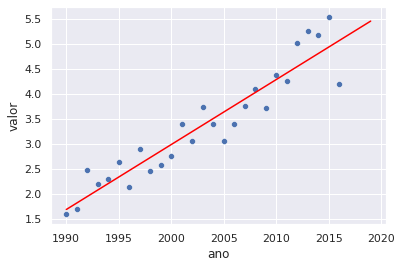

In [179]:
def reta(x,a,b):
    y = a*x+b
    return y

dominio = np.linspace(1990, 2019, 200)
imagem = reta(dominio,coeficienteAngular,coeficienteLinear)
plt.plot(dominio,imagem,color='red')

sns.scatterplot(x='ano',y='valor',data=brasilCereal)

plt.show()

## Regressões Multilineares



Analogamente ao caso anterior, suponha que você também queira fazer uma regressão linear, mas usando mais variáveis. Então o modelo a seguir é o que será utilizado para fins de otimização.

$$y_{i}=\beta_0+x_{i1}\beta_1+x_{i2}\beta_2+x_{i3}\beta_3+\dots+X_{ik}\beta_k+\varepsilon_{i}, \forall i \in [1,n] $$

 \begin{pmatrix}
 y_1 \\
  y_2 \\ 
  y_3 \\ 
  y_4 \\
   \dots \\
    y_n 
    \end{pmatrix}

= \begin{pmatrix}
 1 & x_{11} & x_{21} & \dots & x_{k1} \\
 1 & x_{12} & x_{22} & \dots & x_{k2} \\
 1 & x_{13} & x_{23} & \dots & x_{k3} \\
 1 & x_{14} & x_{24} & \dots & x_{k4} \\
 \dots & \dots & \dots & \dots & \dots \\
 1 & x_{1n} & x_{2n} & \dots & x_{kn}
\end{pmatrix}
X
\begin{pmatrix}
 b_0 \\
 b_1 \\
 b_2 \\
 \dots \\
 b_k
\end{pmatrix}
+
\begin{pmatrix}
 e_1 \\
 e_2 \\
 e_3 \\
 e_4 \\
 \dots \\
 e_n
\end{pmatrix}

Para achar a matrix $b$ dos coeficientes, podemos utilizar a fórmula $$b = \left(X^\mathsf{T}X \right)^{-1}X^\mathsf{T}y$$

In [181]:
diamonds.head()
#Utilizando o np.ones oara criar uma matriz com elementos 1
#E np.array para criar a matriz. Como a matriz vai receber os elementos
#Em linha, temos que fazer a transposta para virar coluna
#Vamos fazer a regressão para o preço do diamante em função do quilate e do valor de x
x = np.array([np.ones(diamonds.shape[0]),diamonds['carat'],diamonds['x'] ])
x=x.T #O método .T para virar transposta
x
y=np.array(diamonds['price']).T
y

#Fórmula para encontrar os coeficientes
b=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

b

array([ 1737.94973799, 10125.98767084, -1026.85685415])

## Outra forma

Utilizando a biblioteca Statsmodels.

In [182]:
import scipy as sp
import statsmodels.formula.api as sm
#A fórmula vai receber o modelo.
#Para comparar os coeficientes da primeira regressão, executar:
#reg = sm.ols(formula='valor~ano', data=brasilCereal.fit()
#Para a segunda, o comando é
reg = sm.ols(formula='price~carat+x', data=diamonds).fit()
#informa o resultado
print(reg.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.570e+05
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:28:46   Log-Likelihood:            -4.7199e+05
No. Observations:               53940   AIC:                         9.440e+05
Df Residuals:                   53937   BIC:                         9.440e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1737.9497    103.623     16.772      0.0

Bônus: Utilizando o Google Drive para armazenar datasets. Colocar o banco de dados no Google Drive e sincronizar o Google Drive no Colab.